# MVP

For my MVP, I tried to build a model with a few numeric features that predicts the total domestic (US) gross of foreign language movies that are not originally released in the US. 

The features include the maximum number of theaters where the movie was shown as well as the interational total gross, among others. 

I split my data into training and test data, then into training and validation data. With this simple test-validation setup, I found that the polynomial model had the highest R^2 value. 

At the bottom of this notebook, you can see a plot depicting my poly model's predicted total domestic gross against the actual total domestic gross. 

Hopefully more features and further regularization will improve the model. 

### Importing package 

In [34]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import numpy as np
import pickle

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


### Loading pickled dataframe

In [35]:
earliestrelease_notdomestic_movies2 = pd.read_pickle('earliestrelease_notdomestic_movies2.pickle')

In [36]:
smaller_df = earliestrelease_notdomestic_movies2.loc[:,['lifetime_gross', 'max_theaters', 'domestic_opening', 
                      'num_opening_theaters','domestic_total_gross', 'international_total_gross', 
                      'earliest_release_location_opening_gross', 'earliest_release_location_original_gross']]

### Splitting up training data into training and test set 

In [37]:
X = smaller_df.loc[:,['max_theaters','num_opening_theaters','international_total_gross', 'earliest_release_location_original_gross']]
y = smaller_df['domestic_total_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

### Splitting training data into training and validation 

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

### Setting up three models: linear, ridge, and poly

In [39]:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

### Training, validating, and testing the models 

In [40]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.521
Ridge Regression val R^2: 0.521
Degree 2 polynomial regression val R^2: 0.856


### Choosing poly 

In [41]:
lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_test, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.641


In [42]:
test_set_pred = lm_poly.predict(X_test)

# Plot showing predicted domestic total gross against actual domestic total gross 

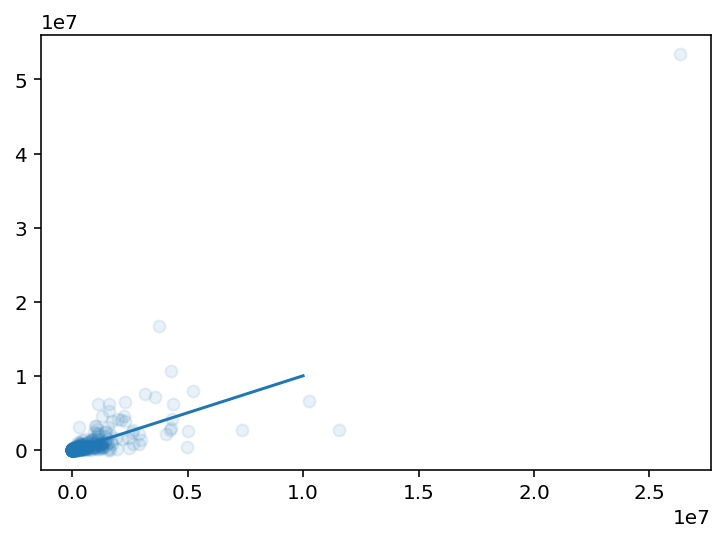

In [43]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,10000000,1000), np.linspace(0,10000000,1000))